In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tensorflow flask


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the base directory in your Google Drive
base_dir = '/content/drive/MyDrive/traffic_dataset/'

# Set paths for 'stop' and 'non_stop' directories
stop_dir = os.path.join(base_dir, 'stop')
non_stop_dir = os.path.join(base_dir, 'non_stop')

# Check if directories are set correctly
print("Stop sign directory: ", stop_dir)
print("Non-stop sign directory: ", non_stop_dir)



Stop sign directory:  /content/drive/MyDrive/traffic_dataset/stop
Non-stop sign directory:  /content/drive/MyDrive/traffic_dataset/non_stop


In [ ]:
#load and augumet the data

# Define image size and batch size
img_size = (150, 150)  # Image dimensions
batch_size = 32        # Number of images processed at once

# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    validation_split=0.2,     # 20% for validation
    rotation_range=30,        # Random rotation
    width_shift_range=0.2,    # Horizontal shift
    height_shift_range=0.2,   # Vertical shift
    shear_range=0.2,          # Shear intensity
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True      # Horizontal flip
)

# Create training and validation generators
train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 158 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
#build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10  # Increase epochs as needed
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.4848 - loss: 0.8999 - val_accuracy: 0.4872 - val_loss: 0.7004
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.5400 - loss: 0.7034 - val_accuracy: 0.5641 - val_loss: 0.6740
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5745 - loss: 0.6769 - val_accuracy: 0.4872 - val_loss: 0.6435
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.6063 - loss: 0.6725 - val_accuracy: 0.7179 - val_loss: 0.5584
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7496 - loss: 0.5444 - val_accuracy: 0.7179 - val_loss: 0.5109
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6926 - loss: 0.5217 - val_accuracy: 0.7436 - val_loss: 0.4481
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7872 - loss: 0.4411 - val_accuracy: 0.7949 - val_loss: 0.3827
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.7703 - loss: 0.4215 - val_accuracy: 0.7436 - val_loss: 0.4327
Epoch 9/10
5/5 ━━━━

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_gen)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 0.8178 - loss: 0.4265
Validation Loss: 0.4267481863498688
Validation Accuracy: 0.8205128312110901


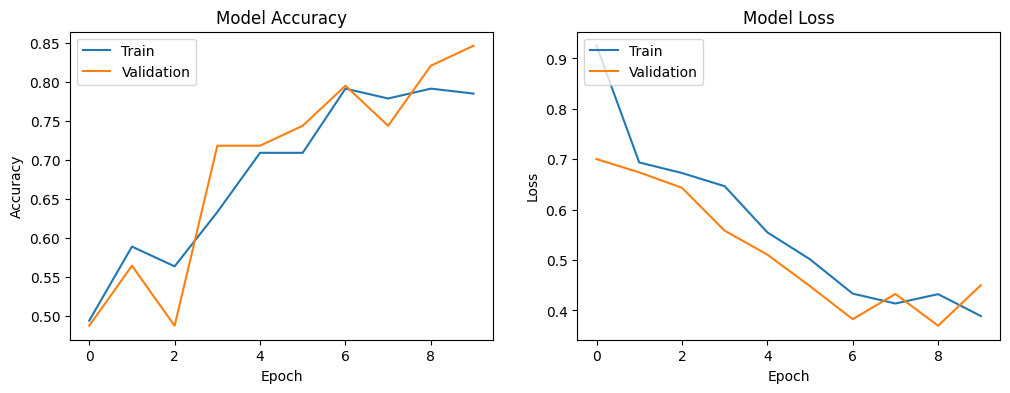

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Saving download.jpeg to download.jpeg
Testing on image: download.jpeg


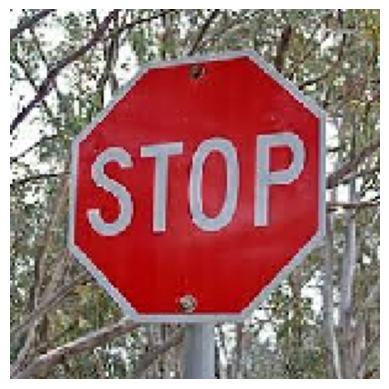

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
This image contains a Stop Sign.


In [ ]:
from google.colab import files
uploaded = files.upload()


import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Assuming you've uploaded an image named 'test_image.jpg'
img_path = list(uploaded.keys())[0]  # This gets the first uploaded image's name
print(f"Testing on image: {img_path}")

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model's input shape
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict whether the image contains a stop sign or not
prediction = model.predict(img_array)

# Interpret the result
if prediction[0] > 0.5:
    print("This image contains a Stop Sign.")
else:
    print("This image does NOT contain a Stop Sign.")




In [ ]:
# Save the trained model in the new Keras format
model.save('/content/drive/MyDrive/stop_sign_classifier.keras')
